# Movement Analysis Tests

*The primary goal here is to determine which videos have complete traffic stops vs partial traffic stops. Let's explore an intuitive  approach that analyzes movement between frames in videos-- assuming that videos with complete traffic stops will start with the cop driving and later stopping (i.e. significantly more movement at the start of the video)*

**The simplest technique to use would be frame differencing. Happily, this is a well defined method that we can just import a package for. Frame differencing is a little less accurate than more sophisticated methods, but it's a lot more efficient. Because it's a little up in the air exactly how percise we need to be, let's start simple and give it a try:**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Image processing
import cv2

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import time

In [2]:
def get_fps(video_file_path):
    """
    This function calculates the Frames Per Second (FPS) of a given video file.
    
    Parameters:
    video_file_path (str): The path to the video file.
    
    Returns:
    fps (float): The FPS of the video file.
    """
    
    # Open the video file using OpenCV's VideoCapture function.
    video = cv2.VideoCapture(video_file_path)
    
    # Use the get method of the video object, with cv2.CAP_PROP_FPS as the 
    # argument, to retrieve the FPS of the video.
    fps = video.get(cv2.CAP_PROP_FPS)
    
    # After retrieving the FPS, release the video file. It's good practice to
    # release resources after we're done using them.
    video.release()
    
    # Return the FPS.
    return fps


In [3]:
def process_video_movement_frame_differencing(video_path):
    """
    This function processes the movement in a video using frame differencing.
    It uses the previously defined get_fps() function to calculate the average 
    movement per second.
    
    Parameters:
    video_path (str): The path to the video file.
    
    Returns:
    movement_per_second_differencing_with_timestamps (list of tuples): A list of
    tuples where each tuple contains a second and the average movement for that
    second.
    """
    
    # Open the video file using OpenCV's VideoCapture function.
    cap = cv2.VideoCapture(video_path)
    
    # Read the first frame from the video.
    ret, prev_frame = cap.read()

    # Initialize an empty list to store the magnitude of movement for each frame.
    movement_magnitude_list_differencing = []

    # Loop through the video frame by frame.
    while True:
        # Read the current frame from the video.
        ret, current_frame = cap.read()
        
        # If the frame was not read successfully, break the loop.
        if not ret:
            break

        # Calculate the  difference between the current and previous frame.
        diff = cv2.absdiff(prev_frame, current_frame)
        
        # Convert the difference image to grayscale.
        gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        
        # Sum the pixel values of the grayscale difference image to get the 
        # total movement in the frame.
        movement = np.sum(gray_diff)
        
        # Append the total movement to the list.
        movement_magnitude_list_differencing.append(movement)

        # Set the current frame as the previous frame for the next iteration.
        prev_frame = current_frame

    # Calculate the Frames Per Second (FPS) of the video.
    fps = int(get_fps(video_path))
    
    # Calculate the average magnitude of movement for each second of the video.
    movement_per_second_differencing = [
        sum(movement_magnitude_list_differencing[i:i+fps])/fps\
        for i in range(0, len(movement_magnitude_list_differencing), fps)]

    # Initialize the second counter and an empty list to 
    # store the average movement for each second with timestamps.
    second = 1
    movement_per_second_differencing_with_timestamps = []
    
    # Loop through the average movement list.
    for element in movement_per_second_differencing:
        # Append a tuple containing the second and the average movement 
        # for that second to the list.
        movement_per_second_differencing_with_timestamps.append((second,element))
        
        # Increment the second counter.
        second += 1

    # Return the list of tuples containing the average movement 
    # for each second with timestamps.
    return movement_per_second_differencing_with_timestamps


In [4]:
filename = '/path/to/your/directory/filename'
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing(filename)

In [5]:
movement_per_second_differencing_with_timestamps

[(1, 338718.75),
 (2, 1063207.5),
 (3, 379467.8),
 (4, 303190.0333333333),
 (5, 219378.16666666666),
 (6, 307762.8),
 (7, 227114.51666666666),
 (8, 223439.4),
 (9, 172603.96666666667),
 (10, 353873.9166666667),
 (11, 327883.0333333333),
 (12, 304200.43333333335),
 (13, 401611.6),
 (14, 560725.8833333333),
 (15, 427065.8),
 (16, 1013719.4833333333),
 (17, 923185.55),
 (18, 899710.15),
 (19, 594823.5666666667),
 (20, 971584.65),
 (21, 1956233.6166666667),
 (22, 2687094.8333333335),
 (23, 3022546.966666667),
 (24, 3792877.1166666667),
 (25, 5280530.266666667),
 (26, 8446083.033333333),
 (27, 10813623.65),
 (28, 8357152.866666666),
 (29, 8310881.966666667),
 (30, 6476060.383333334),
 (31, 5100733.616666666),
 (32, 3698123.033333333),
 (33, 1498533.2666666666),
 (34, 711918.9666666667),
 (35, 1462909.4833333334),
 (36, 3033331.6166666667),
 (37, 5124056.1),
 (38, 9548019.716666667),
 (39, 13631832.666666666),
 (40, 13244219.083333334),
 (41, 13037633.133333333),
 (42, 16022057.566666666),
 

In [5]:
#function to create graph from output of process_video_movement_frame_differencing(video_path)
def create_timeseries_graph(movement_per_second_differencing_with_timestamps):   
    #lets quickly visualize movement/second to get a rough idea of how frame differencing performs
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8,4))
    X = [element[0] for element in movement_per_second_differencing_with_timestamps]
    Y = [element[1] for element in movement_per_second_differencing_with_timestamps]
    ax.plot(X, Y, color='#d2691e')

    ax.set_xlabel('Second')
    ax.set_ylabel('Movement')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title("Movement Analysis Using Frame Differencing",c='grey')
    plt.show()

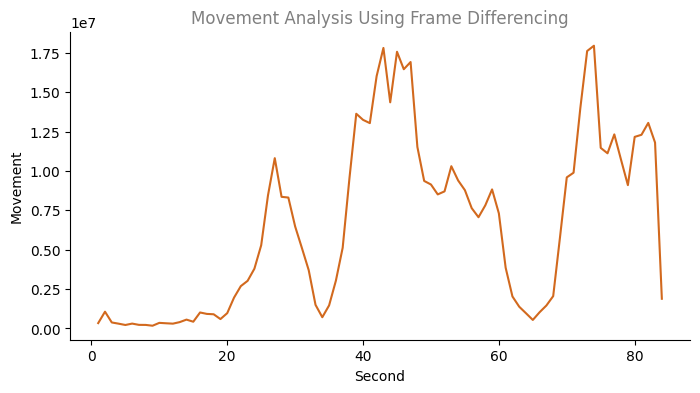

In [7]:
create_timeseries_graph(movement_per_second_differencing_with_timestamps)

*This is neat! The graph lines up with the video pretty well; at second 20 the stopped car begins accelerating, at around second 33 it stops at a stop sign, drives for a bit, and then stops at a stop sign at about the one minute mark (see video)*

**Implementation idea: Set some threshold to determine if car is moving or stationary. Separate videos into categories (i.e. starts above threshold and dips below, starts below threshold and rises above, starts below threshold and stays below threshold, etc...) (see chart below)**

Text(84, 5000000, 'Example Threshold')

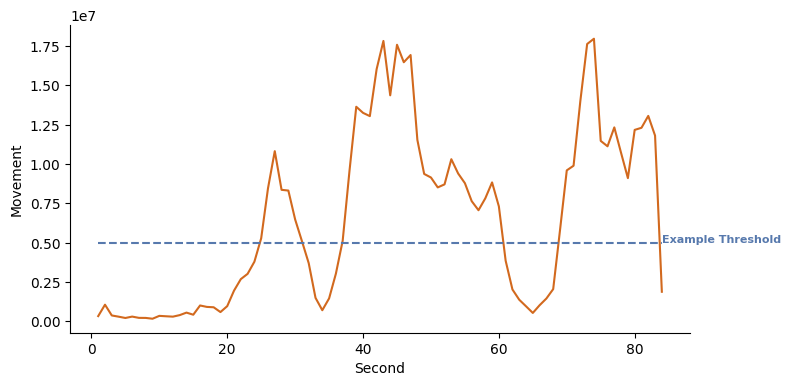

In [10]:
#lets quickly visualize movement/second to get a rough idea of how frame differencing performs
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
X = [element[0] for element in movement_per_second_differencing_with_timestamps]
Y = [element[1] for element in movement_per_second_differencing_with_timestamps]
ax.plot(X, Y, color='#d2691e')

ax.set_xlabel('Second')
ax.set_ylabel('Movement')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#setting threshold arbitrarily at 5e7 for demonstrations
ax.hlines(y=5000000, xmin=1, xmax=84,
colors='#5779AD', linestyles='dashed', lw=1.5, label='Example Threshold')

ax.annotate('Example Threshold',
(84, 5000000),
c='#5779AD',
size=8, weight='bold')

_________________________________________________________________

**It looks like, for this application, frame distancing should work well enough! But let's try out the more percise, but more costly optical flow method to see if there are any differences:**

In [15]:
# Start the timer
start_time = time.time()

# Open the video file
cap = cv2.VideoCapture('/path/to/your/directory/filename')

# Read the first frame and convert it to grayscale
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Initialize a list to store the magnitude of movement for each frame
movement_magnitude_list = []

# Initialize a counter for the frame number
frame_count = 1

# Loop over all frames in the video
while True:
    # Read the next frame
    ret, frame2 = cap.read()
    if not ret:
        break

    # Show the current frame
    cv2.imshow('Frame', frame2)

    # Convert the current frame to grayscale
    next_frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate the optical flow between the previous and current frame
    flow = cv2.calcOpticalFlowFarneback(prvs, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Convert the flow vectors to polar coordinates
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Calculate the average magnitude of the flow vectors
    movement = np.mean(mag)

    # Add the average magnitude to the list
    movement_magnitude_list.append(movement)

    # Update the previous frame and the frame counter
    prvs = next_frame
    frame_count += 1

# Release the video file and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Stop the timer and print the total time taken
end_time = time.time()
print(f"Total time taken: {end_time - start_time:.2f} seconds")


Total time taken: 2966.75 seconds


**It looks like, as is, it takes the script 3350.98 seconds to process a 1:23 video. Yikes! This time contraint may be too much for any meaningful implementation**

In [16]:
movement_per_second_optical_flow = [sum(movement_magnitude_list[i:i+60])/60 for i in range(0, len(movement_magnitude_list), 60)]

second = 1
movement_per_second_optical_flow_with_timestamps = []
for element in movement_per_second_optical_flow:
    movement_per_second_optical_flow_with_timestamps.append((second,element))
    second += 1

Text(0.5, 1.0, 'Movement Analysis Using Optical Flow')

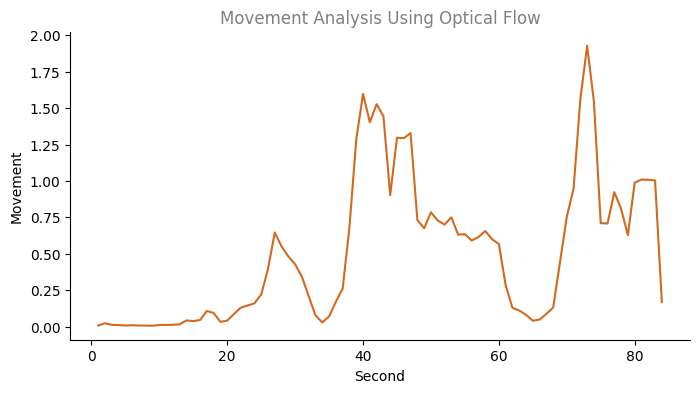

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
X_optical = [element[0] for element in movement_per_second_optical_flow_with_timestamps]
Y_optical = [element[1] for element in movement_per_second_optical_flow_with_timestamps]
ax.plot(X_optical, Y_optical, color='#d2691e')

ax.set_xlabel('Second')
ax.set_ylabel('Movement')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Movement Analysis Using Optical Flow",c='grey')

**Now that we have our two analyses, let's throw the plots side-by-side to compare:**

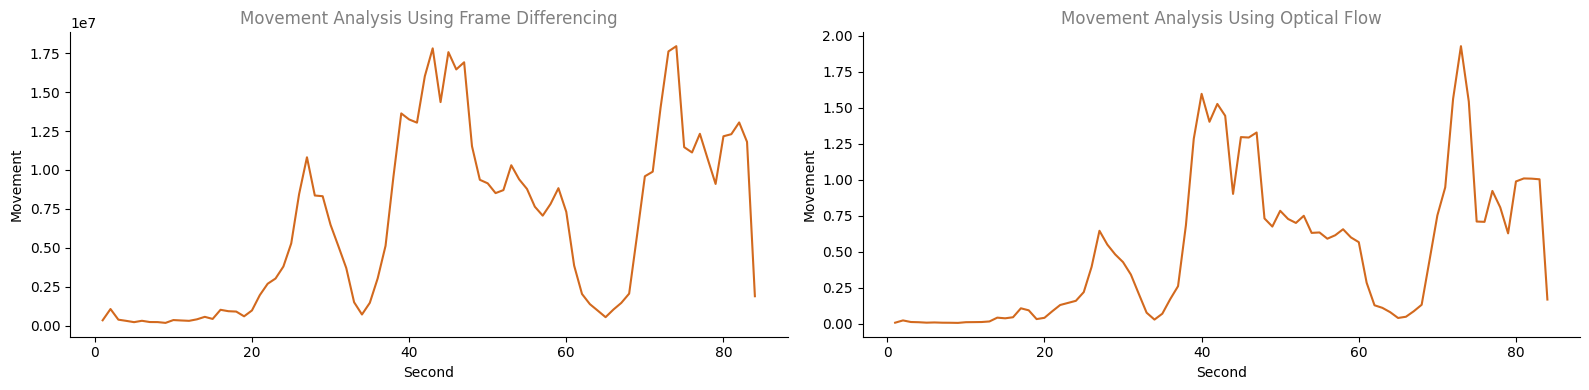

In [18]:
# Define the size of the entire figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))  # 1 row, 2 columns

# PLOT ONE: Movement Analysis Using Frame Differencing
X = [element[0] for element in movement_per_second_differencing_with_timestamps]
Y = [element[1] for element in movement_per_second_differencing_with_timestamps]
ax1.plot(X, Y, color='#d2691e')

ax1.set_xlabel('Second')
ax1.set_ylabel('Movement')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Movement Analysis Using Frame Differencing",c='grey')

# PLOT TWO: Movement Analysis Using Optical Flow
X_optical = [element[0] for element in movement_per_second_optical_flow_with_timestamps]
Y_optical = [element[1] for element in movement_per_second_optical_flow_with_timestamps]
ax2.plot(X_optical, Y_optical, color='#d2691e')

ax2.set_xlabel('Second')
ax2.set_ylabel('Movement')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title("Movement Analysis Using Optical Flow",c='grey')

# Display the plots side by side
plt.tight_layout()  # Ensures proper spacing between the subplots
plt.show()


**Phew! It looks like optical flow is slightly more accurate, but I still think frame differencing should do the trick for what we need to accomplish. Let's try out our frame differencing function on a video of a stationary car that gets hit at around second 5:**

In [19]:
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/Users/ianduke/Desktop/ACLU/computer_vision_testing/stationary_crash.mov')

Text(0.5, 1.0, 'Movement Analysis Using Frame Differencing')

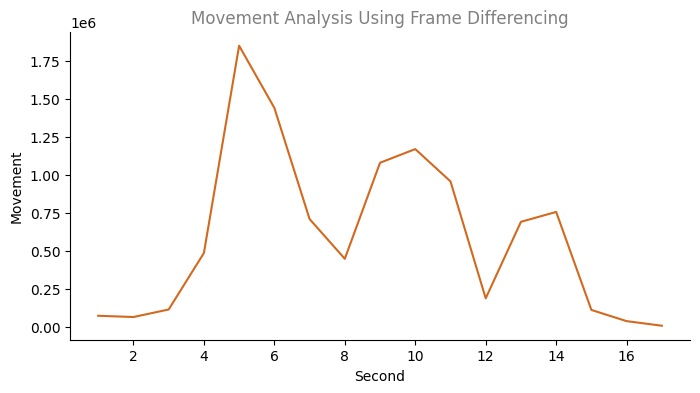

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
X = [element[0] for element in movement_per_second_differencing_with_timestamps]
Y = [element[1] for element in movement_per_second_differencing_with_timestamps]
ax.plot(X, Y, color='#d2691e')

ax.set_xlabel('Second')
ax.set_ylabel('Movement')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Movement Analysis Using Frame Differencing",c='grey')

__________________________________________________________________________________________________________________

## Now lets test frame differencing on some real ACLU data

**/Users/ianduke/Desktop/ACLU/data/bwc_and_dashcam_video/Dep Marquise Williams (P10)/Axon_Body_3_Video_2023-06-01_1647_X60A7214D.mp4**

**^^ Video appears to start mid-traffic stop. Beginning of video has officer standing still with drivers license in hand. Begins walking back to stopped car for additional questioning at around second 25**

In [21]:
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/Users/ianduke/Desktop/ACLU/data/bwc_and_dashcam_video/Dep_Marquise_Williams_(P10)/Axon_Body_3_Video_2023-06-01_1647_X60A7214D.mp4')

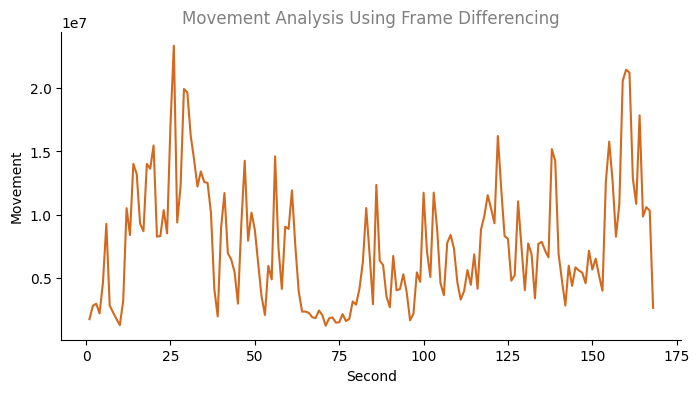

In [22]:
create_timeseries_graph(movement_per_second_differencing_with_timestamps)

Great! The general pattern is emerging here and FPS has been correctly calculated.

Let's apply a smoothing algorithm to get a clearer trend:

In [8]:
#def a moving average plot
def plotMovingAverage(series, window, plot_actual=False, scale=1.96):

    rolling_mean = series.rolling(window=window,center=True).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "#d2691e", label="Rolling mean trend")
    
    if plot_actual:
        plt.plot(series[window:], label="Actual values", color='#a3a8a5', alpha=0.5)
    plt.legend(loc="upper left") 
    plt.grid(False)
    
    ax = plt.gca()  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.show()


In [24]:
movement_element = pd.Series([t[1] for t in movement_per_second_differencing_with_timestamps])

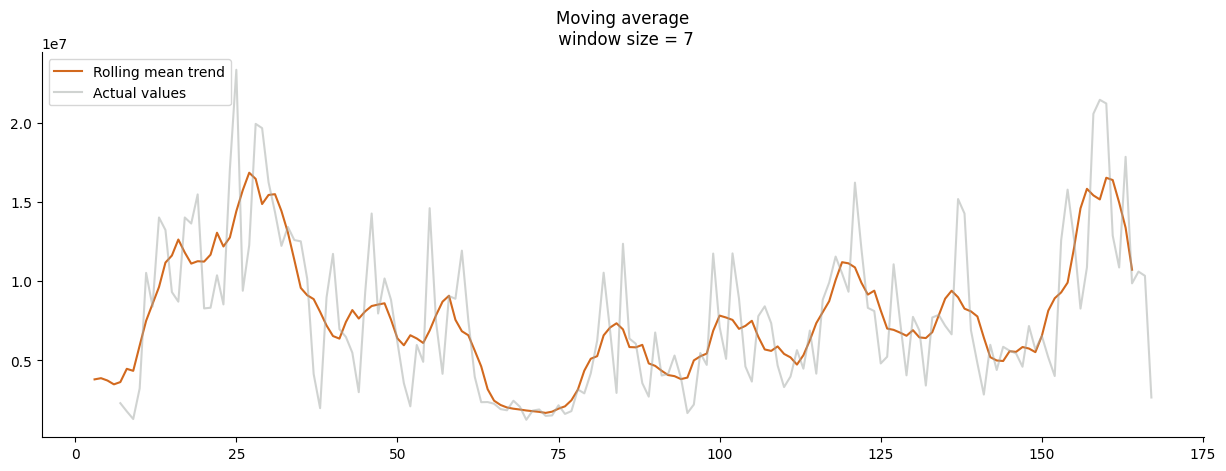

In [25]:
plotMovingAverage(movement_element,7, plot_actual = True)

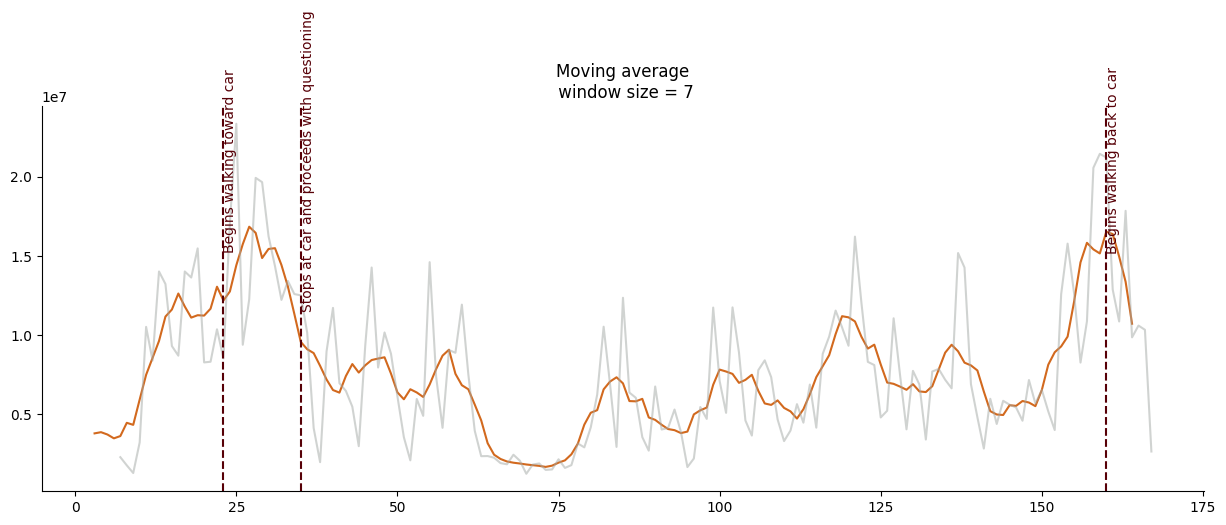

In [26]:
# Define the series and window size for the moving average
series = movement_element
window = 7

# Calculate the moving average of the series
rolling_mean = series.rolling(window=window,center=True).mean()

# Create a new figure with a specific size
plt.figure(figsize=(15,5))

# Set the title of the plot
plt.title("Moving average\n window size = {}".format(window))

# Plot the moving average trend
plt.plot(rolling_mean, "#d2691e", label="Rolling mean trend")

# Plot the actual values
plt.plot(series[window:], label="Actual values", color='#a3a8a5', alpha=0.5)

# Add vertical lines and text annotations at specific x-values
plt.axvline(x=23, color='#570007', linestyle='--')
plt.text(23, max(series)*0.9, 'Begins walking toward car', rotation=90,
         verticalalignment='center', color='#570007')

plt.axvline(x=35, color='#570007', linestyle='--')
plt.text(35, max(series)*0.9, 'Stops at car and proceeds with questioning',
         rotation=90, verticalalignment='center', color='#570007')

plt.axvline(x=2*60 + 40, color='#570007', linestyle='--') # 2:40 converted to seconds
plt.text(2*60 + 40, max(series)*0.9, 'Begins walking back to car', rotation=90,
         verticalalignment='center', color='#570007')

# Remove the top and right spines from the plot
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the grid from the plot
plt.grid(False)

# Display the plot
plt.show()


**Now let's look at a slightly different video: /Users/ianduke/Desktop/ACLU/data/bwc_and_dashcam_video/Dep_Marquise_Williams_(P10)/Traffic_Stop.mp4**

**Here, the cop STARTS the bodycam mid-questioning and then walks back to his cruiser around the 45 second mark**

In [27]:
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/Users/ianduke/Desktop/ACLU/data/bwc_and_dashcam_video/Dep_Marquise_Williams_(P10)/Traffic_Stop.mp4')

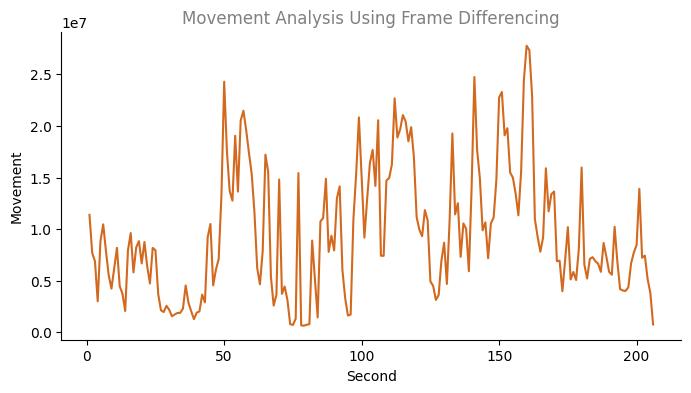

In [28]:
create_timeseries_graph(movement_per_second_differencing_with_timestamps)

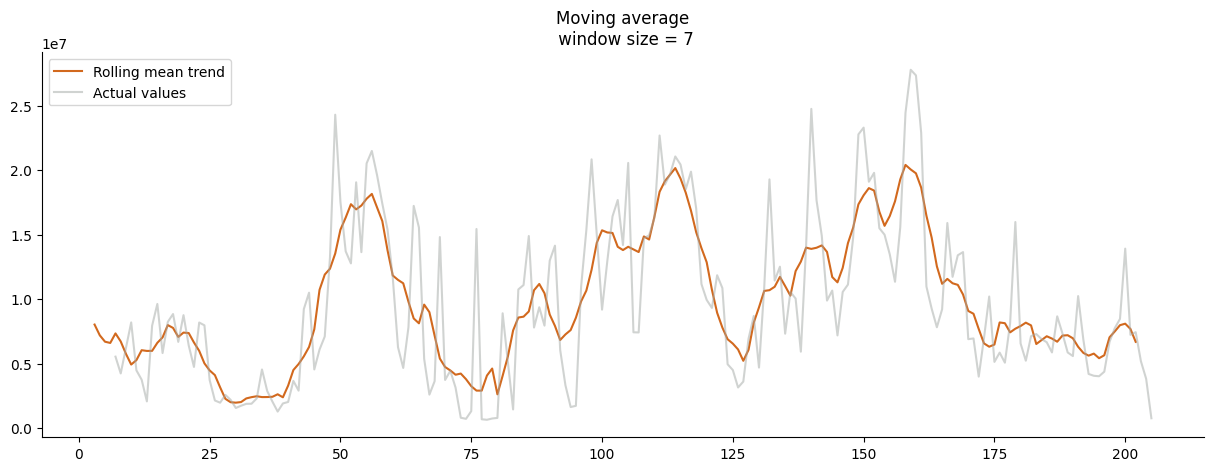

In [29]:
movement_element = pd.Series([t[1] for t in movement_per_second_differencing_with_timestamps])
plotMovingAverage(movement_element,7, plot_actual = True)

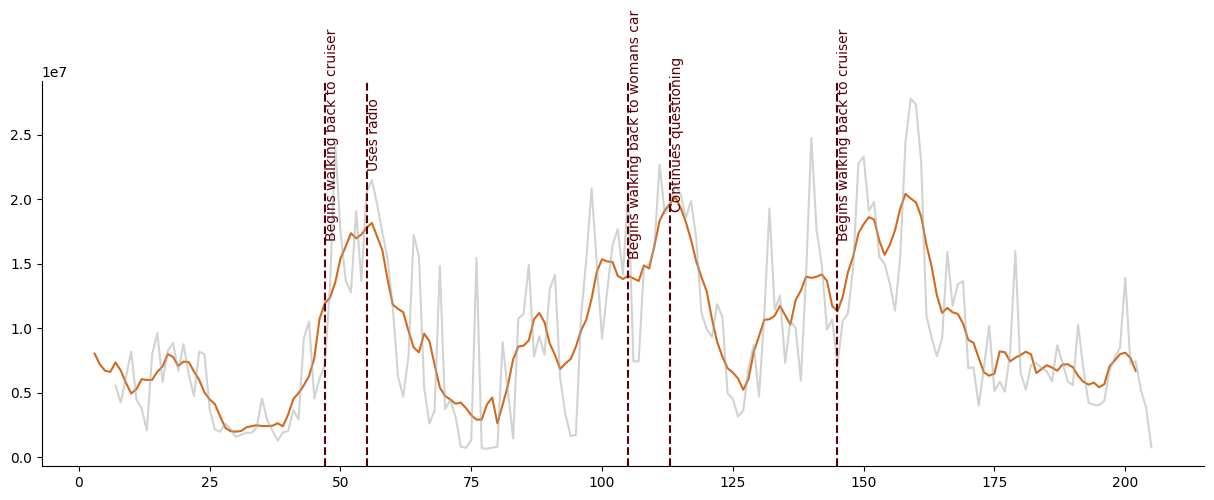

In [30]:
# Define the series and window size for the moving average
series = movement_element
window = 7

# Calculate the moving average of the series
rolling_mean = series.rolling(window=window,center=True).mean()

# Create a new figure with a specific size
plt.figure(figsize=(15,5))

# Plot the moving average trend
plt.plot(rolling_mean, "#d2691e", label="Rolling mean trend")

# Plot the actual values
plt.plot(series[window:], label="Actual values", color='#a3a8a5', alpha=0.5)

# Add vertical lines and text annotations at specific x-values
plt.axvline(x=47, color='#570007', linestyle='--')
plt.text(47, max(series)*0.9, 'Begins walking back to cruiser', rotation=90,
         verticalalignment='center', color='#570007')

plt.axvline(x=55, color='#570007', linestyle='--')
plt.text(55, max(series)*0.9, 'Uses radio', rotation=90,
         verticalalignment='center', color='#570007')

plt.axvline(x=60 + 45, color='#570007', linestyle='--')
plt.text(60 + 45, max(series)*0.9, 'Begins walking back to womans car',
         rotation=90, verticalalignment='center', color='#570007')

plt.axvline(x=60 + 53, color='#570007', linestyle='--') # 2:40 converted to seconds
plt.text(60 + 53, max(series)*0.9, 'Continues questioning', rotation=90,
         verticalalignment='center', color='#570007')

plt.axvline(x=60*2 + 25, color='#570007', linestyle='--') # 2:40 converted to seconds
plt.text(60*2 + 25, max(series)*0.9, 'Begins walking back to cruiser',
         rotation=90, verticalalignment='center', color='#570007')

# Remove the top and right spines from the plot
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the grid from the plot
plt.grid(False)

# Display the plot
plt.show()


___________________________________________________________________________________________________________________

# Idea #2: Combine frame differencing with facial detection (answer "at what periods is there little movement AND the model detects a face?")

**Note: We don't need to reinvent the wheel here or train our own model. cv2.CascadeClassifier has a pretty good pretrained model for facial detection**

In [10]:
import cv2
import numpy as np
import time

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_video_face_detection(video_path):
    cap = cv2.VideoCapture(video_path)

    face_detected_list = []

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Start timing
    start_time = time.time()

    for frame_num in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            break

        # Print the frame number being processed
        #print(f"Processing frame {frame_num + 1} of {total_frames}")

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1,
                                              minNeighbors=5, minSize=(30, 30))
        
        # If at least one face is detected, append 1, else append 0
        if len(faces) > 0:
            face_detected_list.append(1)
        else:
            face_detected_list.append(0)

    # Calculate the presence of a face in each second (1 if face is detected in any frame of that second, 0 otherwise)
    fps = int(get_fps(video_path))
    face_detection_per_second = [1 if any(face_detected_list[i:i+fps]) else 0 for i in range(0, len(face_detected_list), fps)]

    # Organize these in tuples (second, face_detected)
    second = 1
    face_detection_per_second_with_timestamps = []
    for element in face_detection_per_second:
        face_detection_per_second_with_timestamps.append((second, element))
        second += 1

    # End timing
    end_time = time.time()

    print(f"Video processing took {end_time - start_time:.2f} seconds.")
    
    return face_detection_per_second_with_timestamps

# Note: The function get_fps(video_path) needs to be defined or imported.


In [32]:
face_detected = process_video_face_detection('/path/to/your/directory/filename')

Video processing took 330.22 seconds.


In [33]:
#great! create a list of tuples approximating movement for this same video
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/path/to/your/directory/filename')

In [34]:
#join face and movement tuple set on seconds
#lets do this by converting our tuples to dictionaries and then just merging stuff with the same key
dict1 = dict(face_detected)
dict2 = dict(movement_per_second_differencing_with_timestamps)

# Join dictionaries based on keys
result = [(key, dict1[key], dict2[key]) for key in dict1 if key in dict2]

In [35]:
result

[(1, 1, 11391351.24137931),
 (2, 1, 7690497.793103448),
 (3, 0, 6888880.620689655),
 (4, 0, 3008748.620689655),
 (5, 0, 8848255.75862069),
 (6, 0, 10464711.827586208),
 (7, 1, 7884084.0),
 (8, 0, 5537051.655172414),
 (9, 0, 4235596.206896552),
 (10, 0, 6212906.482758621),
 (11, 0, 8189865.517241379),
 (12, 0, 4474057.172413793),
 (13, 0, 3751013.5517241377),
 (14, 0, 2069041.551724138),
 (15, 0, 7936184.068965517),
 (16, 0, 9623009.965517242),
 (17, 1, 5816918.620689655),
 (18, 1, 8231649.344827586),
 (19, 0, 8839785.75862069),
 (20, 0, 6680469.862068965),
 (21, 1, 8754751.689655172),
 (22, 1, 6398927.344827586),
 (23, 1, 4738389.75862069),
 (24, 1, 8180608.793103448),
 (25, 1, 7965982.24137931),
 (26, 1, 3721383.5517241377),
 (27, 1, 2138300.172413793),
 (28, 1, 1968405.8275862068),
 (29, 0, 2571671.7586206896),
 (30, 0, 2191290.3448275863),
 (31, 1, 1556989.1379310344),
 (32, 0, 1732143.7586206896),
 (33, 0, 1879791.0),
 (34, 0, 1887490.2068965517),
 (35, 0, 2300088.379310345),
 (36,

In [15]:
def plotMovingAverage_detectFace(series, window, plot_actual=False, scale=1.96, binary_series=None):
    """
    This function plots the moving average of a series and optionally shades areas where a face is detected.
    
    Parameters:
    series (Series): The time series data.
    window (int): The window size for the moving average.
    plot_actual (bool, optional): Whether to plot the actual values. Defaults to False.
    scale (float, optional): The scale for the confidence interval. Defaults to 1.96.
    binary_series (Series, optional): A binary series that indicates where to shade the plot. Defaults to None.
    """
    
    # Calculate the moving average
    rolling_mean = series.rolling(window=window, center=True).mean()
    
    # Create a new figure
    plt.figure(figsize=(15,5))
    
    # Plot the moving average
    plt.plot(rolling_mean, "#d2691e", label="Rolling mean trend")
    
    # If plot_actual is True, plot the actual values
    if plot_actual:
        plt.plot(series[window:], label="Actual values", color='#a3a8a5', alpha=0.5)
    
    # If binary_series is provided, shade the areas where binary_series is 1
    if binary_series is not None:
        plt.fill_between(series.index, 0, rolling_mean.max(), 
                         where=binary_series==1, color='gray', alpha=0.3)
    
    # Create a custom patch for the legend
    face_detected_patch = mpatches.Patch(color='gray', alpha=0.3, label='Face Detected')
    
    # Add the patch to the legend if binary_series is provided
    if binary_series is not None:
        plt.legend(handles=[face_detected_patch], loc="upper left")
    else:
        plt.legend(loc="upper left")
    
    # Remove the grid
    plt.grid(False)
    
    # Remove the top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the x-ticks to show every second but labels only for every 5 seconds
    ticks = list(range(int(series.index.min()), int(series.index.max()) + 1, 1))
    labels = [str(tick) if tick % 5 == 0 else "" for tick in ticks]
    
    plt.xticks(ticks, labels, fontsize=8)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

In [37]:
movement = pd.Series([t[2] for t in result])
face = pd.Series([t[1] for t in result])

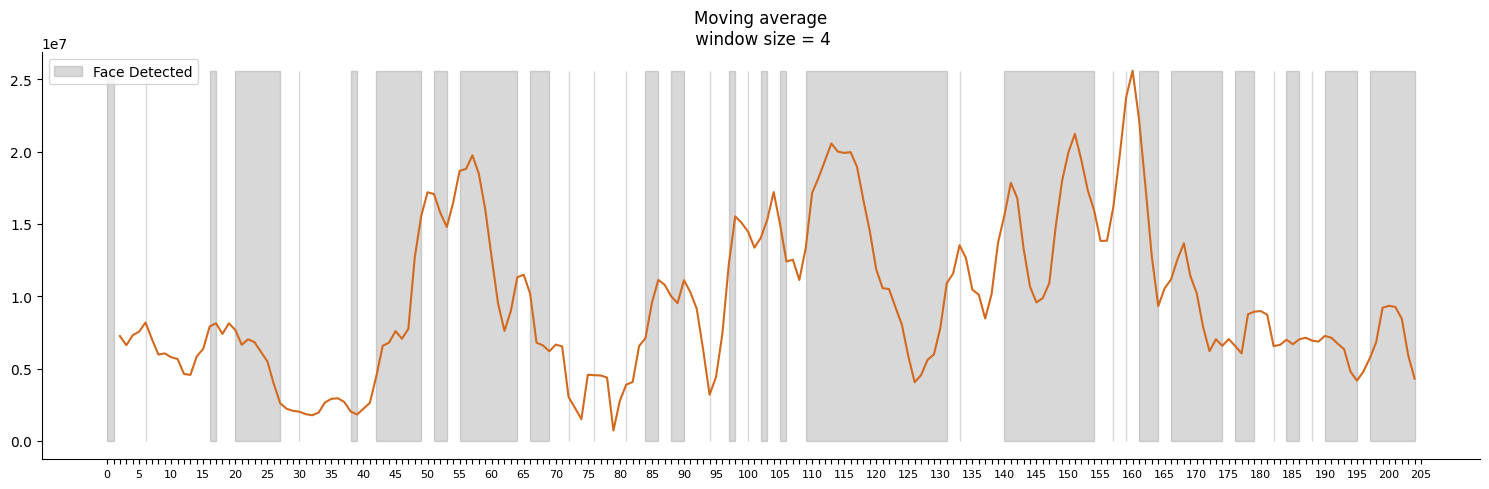

In [38]:
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

## 10-30 Closing Notes: This approach has promise! However, the facial detection is not operating as accurately as I would like. Next step is to (1) compare output to manual review of videos to spot any patterns on when the model is/isn't detecting a face (focus on false positives and false negatives) and (2) begin to fine-tune the existing model

**In this dashcam, the cop drives at fluctuating speeds and there is no face**:

In [4]:
#great! create a list of tuples approximating movement for this same video
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/path/to/your/directory/filename')

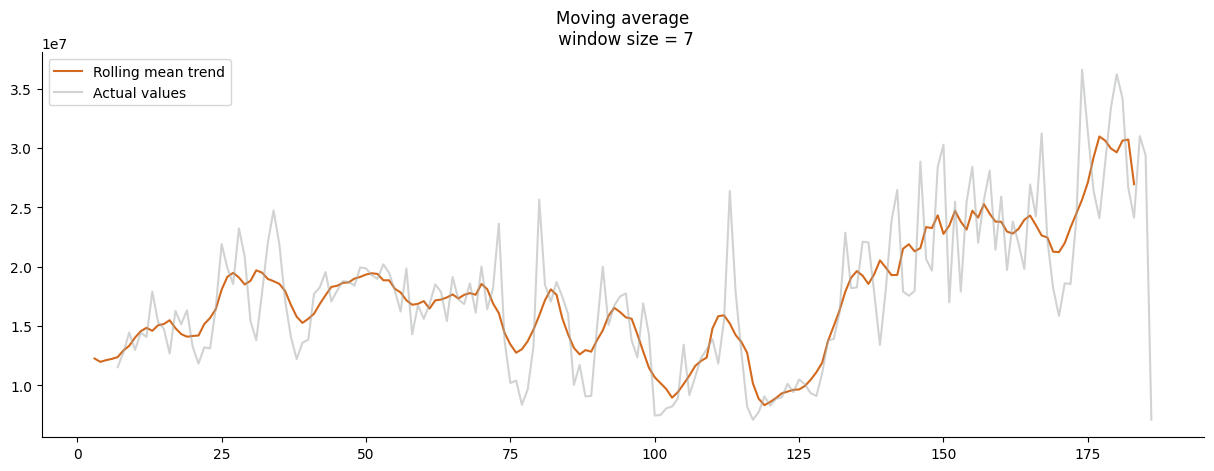

In [9]:
movement_element = pd.Series([t[1] for t in movement_per_second_differencing_with_timestamps])
plotMovingAverage(movement_element,7, plot_actual = True)

In [13]:
face_detected = process_video_face_detection('/path/to/your/directory/filename')

Video processing took 508.12 seconds.


In [20]:
#join face and movement tuple set on seconds
#lets do this by converting our tuples to dictionaries and then just merging stuff with the same key
dict1 = dict(face_detected)
dict2 = dict(movement_per_second_differencing_with_timestamps)

# Join dictionaries based on keys
result = [(key, dict1[key], dict2[key]) for key in dict1 if key in dict2]

movement = pd.Series([t[2] for t in result])
face = pd.Series([t[1] for t in result])

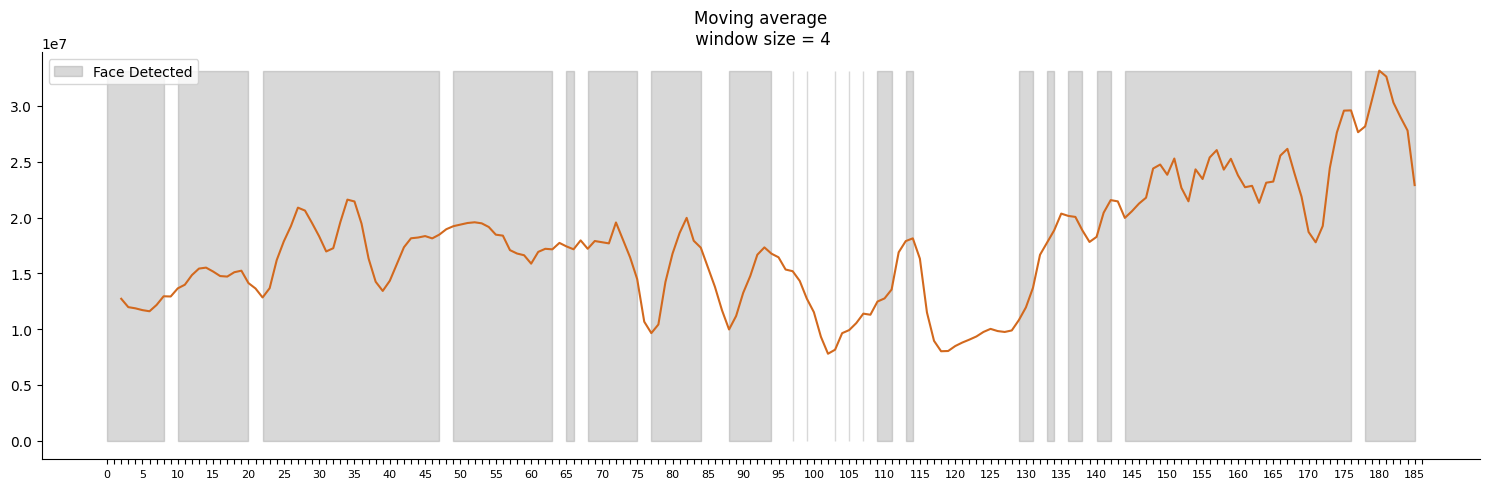

In [21]:
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

### Dang - the CascadeClassifier is not working very well :( Let's try a different pretrained model

In [41]:
#pip install face_recognition opencv-python
import cv2
import face_recognition
import math
import time

def detect_faces_in_video(video_path):
    # Start measuring time
    start_time = time.time()
    
    # Initialize the video capture object
    video_capture = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not video_capture.isOpened():
        print("Error: Could not open video.")
        return None

    # Get video FPS (frames per second) to calculate the number of frames per second
    fps = video_capture.get(cv2.CAP_PROP_FPS)

    # Calculate the number of frames to skip to check one frame per second
    frames_to_skip = math.ceil(fps)

    # Initialize the list to store results for each second
    results_per_second = []

    # Initialize frame counter
    frame_counter = 0

    # Process the video frame by frame
    while True:
        # Read a single frame
        ret, frame = video_capture.read()

        # Break the loop if we've reached the end of the video
        if not ret:
            break

        # Print the current frame number
#         print(f"Processing frame {frame_counter}")

        # Check for a face only on specific frames to save on processing
        if frame_counter % frames_to_skip == 0:
            # Convert the image from BGR color (which OpenCV uses) to RGB color
            rgb_frame = frame[:, :, ::-1]

            # Find all the faces in the current frame of video
            face_locations = face_recognition.face_locations(rgb_frame, model="cnn")

            # Determine if a face was detected
            face_detected = len(face_locations) > 0

            # Append 1 if face is detected, else 0
            results_per_second.append(int(face_detected))

        # Increment the frame counter
        frame_counter += 1

    # Release the video capture object
    video_capture.release()

    # Close all the frames
    cv2.destroyAllWindows()

    # Stop measuring time
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time

    # Print the results and the processing time
    print(f"Detection results per second: {results_per_second}")
    print(f"Processing took {elapsed_time:.2f} seconds.")

    return results_per_second


In [27]:
face_detection = detect_faces_in_video('/path/to/your/directory/filename')

Processing frame 0
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Processing frame 48
Processing frame 49
Processing

Processing frame 421
Processing frame 422
Processing frame 423
Processing frame 424
Processing frame 425
Processing frame 426
Processing frame 427
Processing frame 428
Processing frame 429
Processing frame 430
Processing frame 431
Processing frame 432
Processing frame 433
Processing frame 434
Processing frame 435
Processing frame 436
Processing frame 437
Processing frame 438
Processing frame 439
Processing frame 440
Processing frame 441
Processing frame 442
Processing frame 443
Processing frame 444
Processing frame 445
Processing frame 446
Processing frame 447
Processing frame 448
Processing frame 449
Processing frame 450
Processing frame 451
Processing frame 452
Processing frame 453
Processing frame 454
Processing frame 455
Processing frame 456
Processing frame 457
Processing frame 458
Processing frame 459
Processing frame 460
Processing frame 461
Processing frame 462
Processing frame 463
Processing frame 464
Processing frame 465
Processing frame 466
Processing frame 467
Processing fr

Processing frame 841
Processing frame 842
Processing frame 843
Processing frame 844
Processing frame 845
Processing frame 846
Processing frame 847
Processing frame 848
Processing frame 849
Processing frame 850
Processing frame 851
Processing frame 852
Processing frame 853
Processing frame 854
Processing frame 855
Processing frame 856
Processing frame 857
Processing frame 858
Processing frame 859
Processing frame 860
Processing frame 861
Processing frame 862
Processing frame 863
Processing frame 864
Processing frame 865
Processing frame 866
Processing frame 867
Processing frame 868
Processing frame 869
Processing frame 870
Processing frame 871
Processing frame 872
Processing frame 873
Processing frame 874
Processing frame 875
Processing frame 876
Processing frame 877
Processing frame 878
Processing frame 879
Processing frame 880
Processing frame 881
Processing frame 882
Processing frame 883
Processing frame 884
Processing frame 885
Processing frame 886
Processing frame 887
Processing fr

Processing frame 1231
Processing frame 1232
Processing frame 1233
Processing frame 1234
Processing frame 1235
Processing frame 1236
Processing frame 1237
Processing frame 1238
Processing frame 1239
Processing frame 1240
Processing frame 1241
Processing frame 1242
Processing frame 1243
Processing frame 1244
Processing frame 1245
Processing frame 1246
Processing frame 1247
Processing frame 1248
Processing frame 1249
Processing frame 1250
Processing frame 1251
Processing frame 1252
Processing frame 1253
Processing frame 1254
Processing frame 1255
Processing frame 1256
Processing frame 1257
Processing frame 1258
Processing frame 1259
Processing frame 1260
Processing frame 1261
Processing frame 1262
Processing frame 1263
Processing frame 1264
Processing frame 1265
Processing frame 1266
Processing frame 1267
Processing frame 1268
Processing frame 1269
Processing frame 1270
Processing frame 1271
Processing frame 1272
Processing frame 1273
Processing frame 1274
Processing frame 1275
Processing

Processing frame 1621
Processing frame 1622
Processing frame 1623
Processing frame 1624
Processing frame 1625
Processing frame 1626
Processing frame 1627
Processing frame 1628
Processing frame 1629
Processing frame 1630
Processing frame 1631
Processing frame 1632
Processing frame 1633
Processing frame 1634
Processing frame 1635
Processing frame 1636
Processing frame 1637
Processing frame 1638
Processing frame 1639
Processing frame 1640
Processing frame 1641
Processing frame 1642
Processing frame 1643
Processing frame 1644
Processing frame 1645
Processing frame 1646
Processing frame 1647
Processing frame 1648
Processing frame 1649
Processing frame 1650
Processing frame 1651
Processing frame 1652
Processing frame 1653
Processing frame 1654
Processing frame 1655
Processing frame 1656
Processing frame 1657
Processing frame 1658
Processing frame 1659
Processing frame 1660
Processing frame 1661
Processing frame 1662
Processing frame 1663
Processing frame 1664
Processing frame 1665
Processing

Processing frame 2011
Processing frame 2012
Processing frame 2013
Processing frame 2014
Processing frame 2015
Processing frame 2016
Processing frame 2017
Processing frame 2018
Processing frame 2019
Processing frame 2020
Processing frame 2021
Processing frame 2022
Processing frame 2023
Processing frame 2024
Processing frame 2025
Processing frame 2026
Processing frame 2027
Processing frame 2028
Processing frame 2029
Processing frame 2030
Processing frame 2031
Processing frame 2032
Processing frame 2033
Processing frame 2034
Processing frame 2035
Processing frame 2036
Processing frame 2037
Processing frame 2038
Processing frame 2039
Processing frame 2040
Processing frame 2041
Processing frame 2042
Processing frame 2043
Processing frame 2044
Processing frame 2045
Processing frame 2046
Processing frame 2047
Processing frame 2048
Processing frame 2049
Processing frame 2050
Processing frame 2051
Processing frame 2052
Processing frame 2053
Processing frame 2054
Processing frame 2055
Processing

Processing frame 2401
Processing frame 2402
Processing frame 2403
Processing frame 2404
Processing frame 2405
Processing frame 2406
Processing frame 2407
Processing frame 2408
Processing frame 2409
Processing frame 2410
Processing frame 2411
Processing frame 2412
Processing frame 2413
Processing frame 2414
Processing frame 2415
Processing frame 2416
Processing frame 2417
Processing frame 2418
Processing frame 2419
Processing frame 2420
Processing frame 2421
Processing frame 2422
Processing frame 2423
Processing frame 2424
Processing frame 2425
Processing frame 2426
Processing frame 2427
Processing frame 2428
Processing frame 2429
Processing frame 2430
Processing frame 2431
Processing frame 2432
Processing frame 2433
Processing frame 2434
Processing frame 2435
Processing frame 2436
Processing frame 2437
Processing frame 2438
Processing frame 2439
Processing frame 2440
Processing frame 2441
Processing frame 2442
Processing frame 2443
Processing frame 2444
Processing frame 2445
Processing

Processing frame 2791
Processing frame 2792
Processing frame 2793
Processing frame 2794
Processing frame 2795
Processing frame 2796
Processing frame 2797
Processing frame 2798
Processing frame 2799
Processing frame 2800
Processing frame 2801
Processing frame 2802
Processing frame 2803
Processing frame 2804
Processing frame 2805
Processing frame 2806
Processing frame 2807
Processing frame 2808
Processing frame 2809
Processing frame 2810
Processing frame 2811
Processing frame 2812
Processing frame 2813
Processing frame 2814
Processing frame 2815
Processing frame 2816
Processing frame 2817
Processing frame 2818
Processing frame 2819
Processing frame 2820
Processing frame 2821
Processing frame 2822
Processing frame 2823
Processing frame 2824
Processing frame 2825
Processing frame 2826
Processing frame 2827
Processing frame 2828
Processing frame 2829
Processing frame 2830
Processing frame 2831
Processing frame 2832
Processing frame 2833
Processing frame 2834
Processing frame 2835
Processing

Processing frame 3181
Processing frame 3182
Processing frame 3183
Processing frame 3184
Processing frame 3185
Processing frame 3186
Processing frame 3187
Processing frame 3188
Processing frame 3189
Processing frame 3190
Processing frame 3191
Processing frame 3192
Processing frame 3193
Processing frame 3194
Processing frame 3195
Processing frame 3196
Processing frame 3197
Processing frame 3198
Processing frame 3199
Processing frame 3200
Processing frame 3201
Processing frame 3202
Processing frame 3203
Processing frame 3204
Processing frame 3205
Processing frame 3206
Processing frame 3207
Processing frame 3208
Processing frame 3209
Processing frame 3210
Processing frame 3211
Processing frame 3212
Processing frame 3213
Processing frame 3214
Processing frame 3215
Processing frame 3216
Processing frame 3217
Processing frame 3218
Processing frame 3219
Processing frame 3220
Processing frame 3221
Processing frame 3222
Processing frame 3223
Processing frame 3224
Processing frame 3225
Processing

Processing frame 3571
Processing frame 3572
Processing frame 3573
Processing frame 3574
Processing frame 3575
Processing frame 3576
Processing frame 3577
Processing frame 3578
Processing frame 3579
Processing frame 3580
Processing frame 3581
Processing frame 3582
Processing frame 3583
Processing frame 3584
Processing frame 3585
Processing frame 3586
Processing frame 3587
Processing frame 3588
Processing frame 3589
Processing frame 3590
Processing frame 3591
Processing frame 3592
Processing frame 3593
Processing frame 3594
Processing frame 3595
Processing frame 3596
Processing frame 3597
Processing frame 3598
Processing frame 3599
Processing frame 3600
Processing frame 3601
Processing frame 3602
Processing frame 3603
Processing frame 3604
Processing frame 3605
Processing frame 3606
Processing frame 3607
Processing frame 3608
Processing frame 3609
Processing frame 3610
Processing frame 3611
Processing frame 3612
Processing frame 3613
Processing frame 3614
Processing frame 3615
Processing

Processing frame 3961
Processing frame 3962
Processing frame 3963
Processing frame 3964
Processing frame 3965
Processing frame 3966
Processing frame 3967
Processing frame 3968
Processing frame 3969
Processing frame 3970
Processing frame 3971
Processing frame 3972
Processing frame 3973
Processing frame 3974
Processing frame 3975
Processing frame 3976
Processing frame 3977
Processing frame 3978
Processing frame 3979
Processing frame 3980
Processing frame 3981
Processing frame 3982
Processing frame 3983
Processing frame 3984
Processing frame 3985
Processing frame 3986
Processing frame 3987
Processing frame 3988
Processing frame 3989
Processing frame 3990
Processing frame 3991
Processing frame 3992
Processing frame 3993
Processing frame 3994
Processing frame 3995
Processing frame 3996
Processing frame 3997
Processing frame 3998
Processing frame 3999
Processing frame 4000
Processing frame 4001
Processing frame 4002
Processing frame 4003
Processing frame 4004
Processing frame 4005
Processing

Processing frame 4351
Processing frame 4352
Processing frame 4353
Processing frame 4354
Processing frame 4355
Processing frame 4356
Processing frame 4357
Processing frame 4358
Processing frame 4359
Processing frame 4360
Processing frame 4361
Processing frame 4362
Processing frame 4363
Processing frame 4364
Processing frame 4365
Processing frame 4366
Processing frame 4367
Processing frame 4368
Processing frame 4369
Processing frame 4370
Processing frame 4371
Processing frame 4372
Processing frame 4373
Processing frame 4374
Processing frame 4375
Processing frame 4376
Processing frame 4377
Processing frame 4378
Processing frame 4379
Processing frame 4380
Processing frame 4381
Processing frame 4382
Processing frame 4383
Processing frame 4384
Processing frame 4385
Processing frame 4386
Processing frame 4387
Processing frame 4388
Processing frame 4389
Processing frame 4390
Processing frame 4391
Processing frame 4392
Processing frame 4393
Processing frame 4394
Processing frame 4395
Processing

Processing frame 4741
Processing frame 4742
Processing frame 4743
Processing frame 4744
Processing frame 4745
Processing frame 4746
Processing frame 4747
Processing frame 4748
Processing frame 4749
Processing frame 4750
Processing frame 4751
Processing frame 4752
Processing frame 4753
Processing frame 4754
Processing frame 4755
Processing frame 4756
Processing frame 4757
Processing frame 4758
Processing frame 4759
Processing frame 4760
Processing frame 4761
Processing frame 4762
Processing frame 4763
Processing frame 4764
Processing frame 4765
Processing frame 4766
Processing frame 4767
Processing frame 4768
Processing frame 4769
Processing frame 4770
Processing frame 4771
Processing frame 4772
Processing frame 4773
Processing frame 4774
Processing frame 4775
Processing frame 4776
Processing frame 4777
Processing frame 4778
Processing frame 4779
Processing frame 4780
Processing frame 4781
Processing frame 4782
Processing frame 4783
Processing frame 4784
Processing frame 4785
Processing

Processing frame 5131
Processing frame 5132
Processing frame 5133
Processing frame 5134
Processing frame 5135
Processing frame 5136
Processing frame 5137
Processing frame 5138
Processing frame 5139
Processing frame 5140
Processing frame 5141
Processing frame 5142
Processing frame 5143
Processing frame 5144
Processing frame 5145
Processing frame 5146
Processing frame 5147
Processing frame 5148
Processing frame 5149
Processing frame 5150
Processing frame 5151
Processing frame 5152
Processing frame 5153
Processing frame 5154
Processing frame 5155
Processing frame 5156
Processing frame 5157
Processing frame 5158
Processing frame 5159
Processing frame 5160
Processing frame 5161
Processing frame 5162
Processing frame 5163
Processing frame 5164
Processing frame 5165
Processing frame 5166
Processing frame 5167
Processing frame 5168
Processing frame 5169
Processing frame 5170
Processing frame 5171
Processing frame 5172
Processing frame 5173
Processing frame 5174
Processing frame 5175
Processing

Processing frame 5521
Processing frame 5522
Processing frame 5523
Processing frame 5524
Processing frame 5525
Processing frame 5526
Processing frame 5527
Processing frame 5528
Processing frame 5529
Processing frame 5530
Processing frame 5531
Processing frame 5532
Processing frame 5533
Processing frame 5534
Processing frame 5535
Processing frame 5536
Processing frame 5537
Processing frame 5538
Processing frame 5539
Processing frame 5540
Processing frame 5541
Processing frame 5542
Processing frame 5543
Processing frame 5544
Processing frame 5545
Processing frame 5546
Processing frame 5547
Processing frame 5548
Processing frame 5549
Processing frame 5550
Processing frame 5551
Processing frame 5552
Processing frame 5553
Processing frame 5554
Processing frame 5555
Processing frame 5556
Processing frame 5557
Processing frame 5558
Processing frame 5559
Processing frame 5560
Processing frame 5561
Processing frame 5562
Processing frame 5563
Processing frame 5564
Processing frame 5565
Processing

Processing frame 5911
Processing frame 5912
Processing frame 5913
Processing frame 5914
Processing frame 5915
Processing frame 5916
Processing frame 5917
Processing frame 5918
Processing frame 5919
Processing frame 5920
Processing frame 5921
Processing frame 5922
Processing frame 5923
Processing frame 5924
Processing frame 5925
Processing frame 5926
Processing frame 5927
Processing frame 5928
Processing frame 5929
Processing frame 5930
Processing frame 5931
Processing frame 5932
Processing frame 5933
Processing frame 5934
Processing frame 5935
Processing frame 5936
Processing frame 5937
Processing frame 5938
Processing frame 5939
Processing frame 5940
Processing frame 5941
Processing frame 5942
Processing frame 5943
Processing frame 5944
Processing frame 5945
Processing frame 5946
Processing frame 5947
Processing frame 5948
Processing frame 5949
Processing frame 5950
Processing frame 5951
Processing frame 5952
Processing frame 5953
Processing frame 5954
Detection results per second: [0

In [28]:
face_detection

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [29]:
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/path/to/your/directory/filename')

In [38]:
movement = pd.Series([t[1] for t in updated_tuples])
face = pd.Series([t[2] for t in updated_tuples])

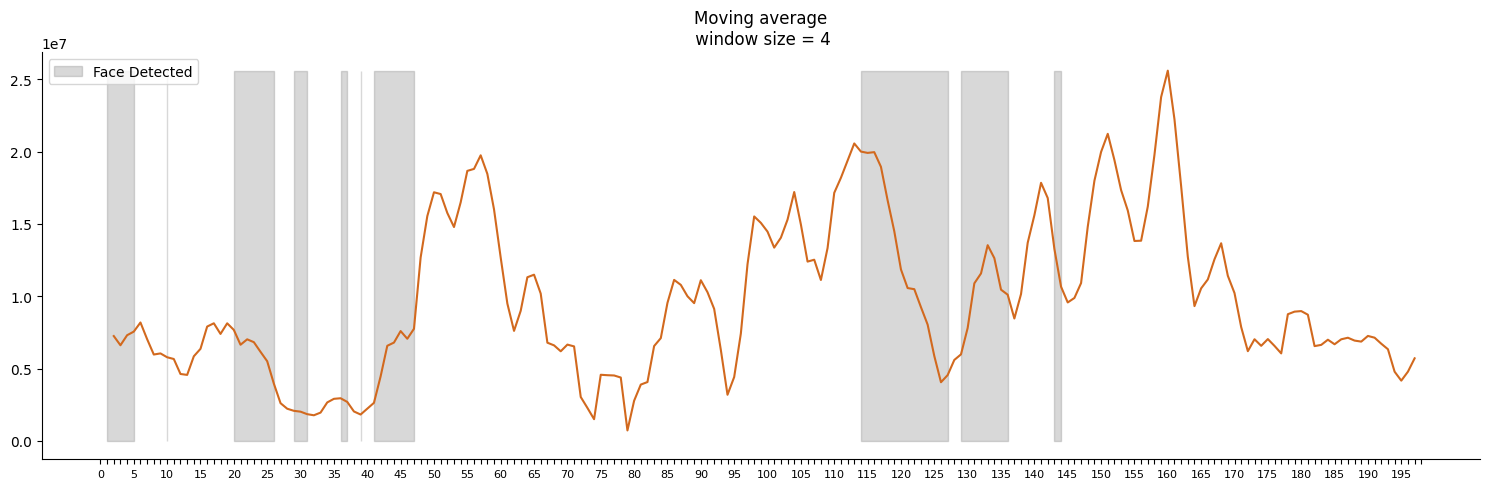

In [39]:
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

This is great!!! Here, the plot cleanly catches periods of time the cop was actively questioning the woman in the video (between seconds 0 - 47 and again between seconds 114 - 144) 

### Lets try this same process with a new video and see if we can predict when the cop is questioning the woman

In [42]:
face_detection = detect_faces_in_video('/path/to/your/directory/filename')

Detection results per second: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing('/path/to/your/directory/filename')

In [46]:

updated_tuples = append_binaries_to_tuples(movement_per_second_differencing_with_timestamps, face_detection)


In [47]:
movement = pd.Series([t[1] for t in updated_tuples])
face = pd.Series([t[2] for t in updated_tuples])

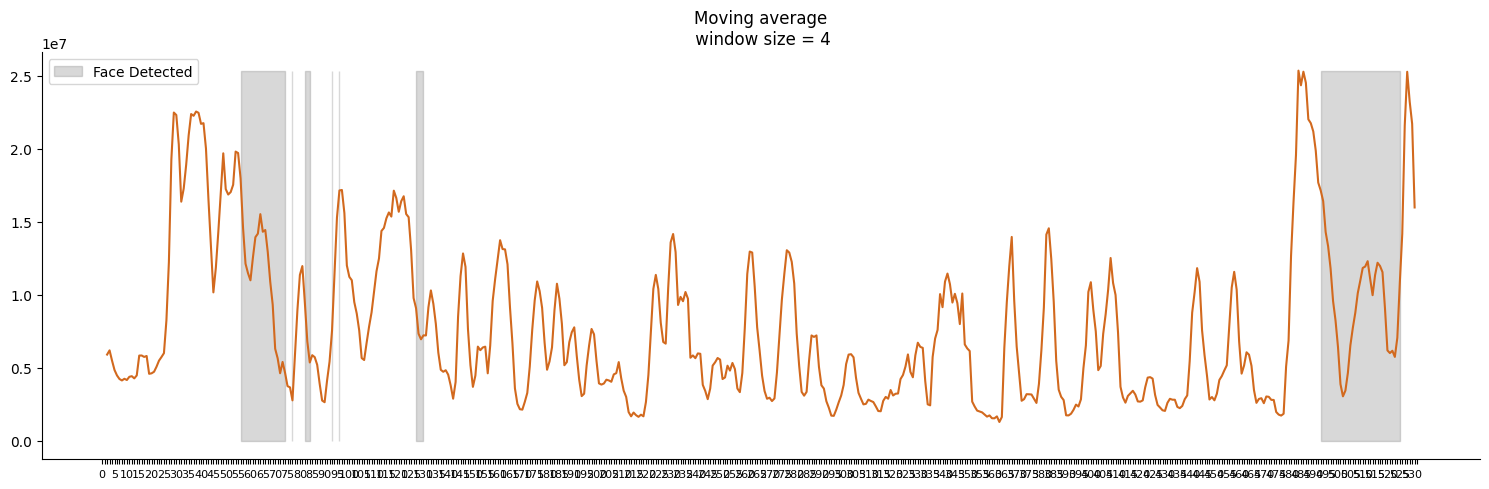

In [48]:
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

## Works again! Let's try with a couple more videos

In [ ]:
path = '/path/to/your/directory/filename'

face_detection = detect_faces_in_video(path)
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing(path)
updated_tuples = append_binaries_to_tuples(movement_per_second_differencing_with_timestamps, face_detection)
movement = pd.Series([t[1] for t in updated_tuples])
face = pd.Series([t[2] for t in updated_tuples])
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

In [ ]:
path = '/path/to/your/directory/filename'

face_detection = detect_faces_in_video(path)
movement_per_second_differencing_with_timestamps = process_video_movement_frame_differencing(path)
updated_tuples = append_binaries_to_tuples(movement_per_second_differencing_with_timestamps, face_detection)
movement = pd.Series([t[1] for t in updated_tuples])
face = pd.Series([t[2] for t in updated_tuples])
plotMovingAverage_detectFace(series = movement, window = 4, plot_actual=False, scale=1.96, binary_series=face)

# 11 - 1 Closing Notes: 

**We now have a function that works pretty dang well. The biggest downside to this approach, however, is how long it takes. So here is the question for you to consider: do we really need to analyze the ENTIRE video? Would, say, the first minute be enough to determine the completeness of the stop?**

**IDEA: Run frame by frame until the function detects a 'chunk' of a completed interaction**